In [ ]:
!pip install Document

  Preparing metadata (setup.py) ... done
  Created wheel for Document: filename=document-1.0-py3-none-any.whl size=8764 sha256=c4ae0765632d32195a0874dc378a40bcc9aaa1fc9379ea269692dfa83f82b215
  Stored in directory: /root/.cache/pip/wheels/68/ac/8e/4bf7a4f454fcbd96af3be9f23268ee72151302643d5b8d5290
Successfully built Document


In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.4/237.4 kB 5.2 MB/s eta 0:00:00


In [31]:
from docx import Document
from collections import Counter
import re

doc = Document("Electrical engineering.docx")

word_counter = Counter()

word_pattern = re.compile(r'\b\w+\b')

for paragraph in doc.paragraphs:
    words = word_pattern.findall(paragraph.text.lower())
    word_counter.update(words)

top_words = word_counter.most_common(10)

for word, count in top_words:
    print(f"{word}: {count}")

и: 77
в: 74
для: 37
энергии: 26
нанокомпозитов: 24
с: 21
на: 21
литий: 17
к: 16
накопления: 15


In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [33]:
import PyPDF2
from collections import Counter
import re

with open('5f3cd76bcd3d3e00014db5da.pdf', 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    word_counter = Counter()
    word_pattern = re.compile(r'\b\w+\b')
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        page_text = page.extract_text()

        words = word_pattern.findall(page_text.lower())
        word_counter.update(words)
top_words = word_counter.most_common(20)
for word, count in top_words:
    print(f"{word}: {count}")

в: 391
и: 304
с: 224
на: 191
для: 120
а: 93
1: 87
структур: 79
2: 76
при: 76
что: 72
из: 67
3: 67
нанотрубок: 63
рисунок: 53
углеродных: 52
к: 51
5: 50
p: 48
4: 47


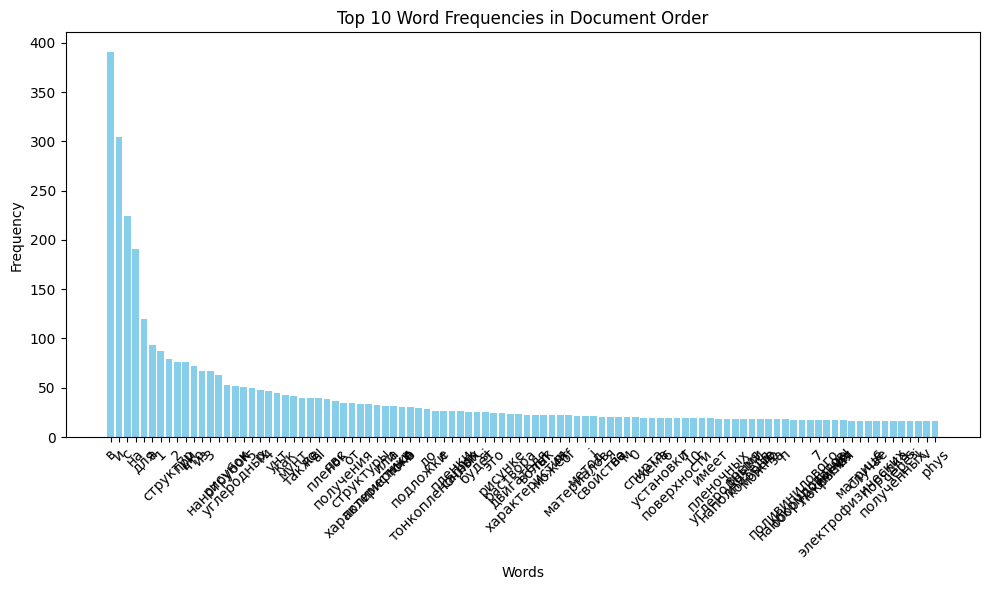

In [34]:
import PyPDF2
import re
from collections import Counter
import matplotlib.pyplot as plt
with open('5f3cd76bcd3d3e00014db5da.pdf', 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    words_in_order = []
    word_pattern = re.compile(r'\b\w+\b')

    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        page_text = page.extract_text()

        words = word_pattern.findall(page_text.lower())
        words_in_order.extend(words)
word_counter = Counter(words_in_order)

top_words = word_counter.most_common(100)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies in Document Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

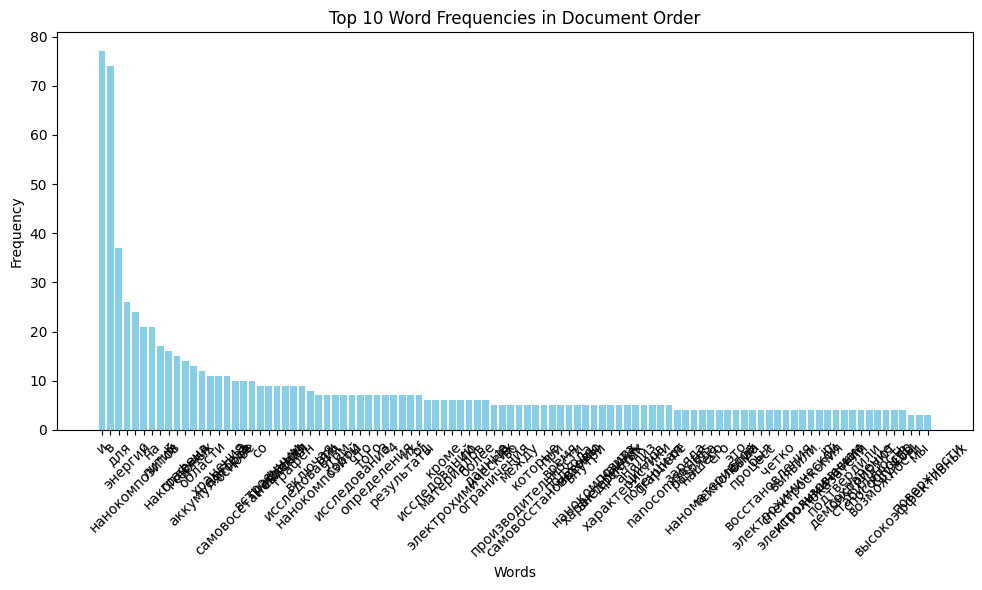

In [ ]:
from docx import Document
import re
from collections import Counter
import matplotlib.pyplot as plt
doc = Document("Electrical engineering.docx")

words_in_order = []

word_pattern = re.compile(r'\b\w+\b')

for paragraph in doc.paragraphs:
    words = word_pattern.findall(paragraph.text.lower())
    words_in_order.extend(words)

word_counter = Counter(words_in_order)

top_words = word_counter.most_common(100)

words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies in Document Order')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

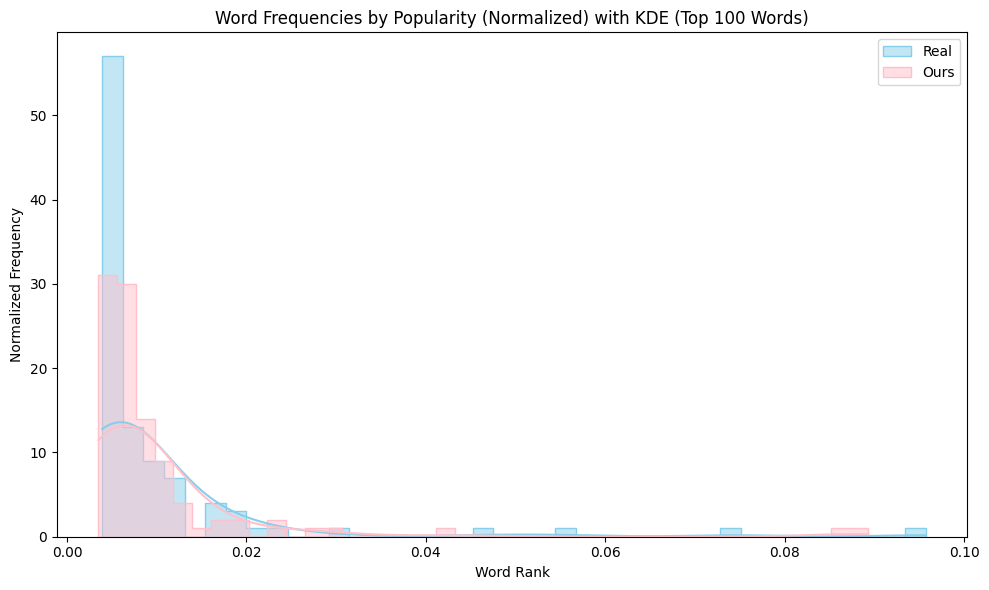

In [30]:
import PyPDF2
from docx import Document
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

with open('5f3cd76bcd3d3e00014db5da.pdf', 'rb') as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    words_in_order_pdf = []
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        page_text = page.extract_text()
        words = re.findall(r'\b\w+\b', page_text.lower())
        words_in_order_pdf.extend(words)
doc = Document("Electrical engineering.docx")
words_in_order_docx = []
for paragraph in doc.paragraphs:
    words = re.findall(r'\b\w+\b', paragraph.text.lower())
    words_in_order_docx.extend(words)
word_counter_pdf = Counter(words_in_order_pdf)
word_counter_docx = Counter(words_in_order_docx)
sorted_words_pdf, sorted_counts_pdf = zip(*sorted(word_counter_pdf.items(), key=lambda item: item[1], reverse=True)[:100])
sorted_words_docx, sorted_counts_docx = zip(*sorted(word_counter_docx.items(), key=lambda item: item[1], reverse=True)[:100])
total_pdf = sum(sorted_counts_pdf)
total_docx = sum(sorted_counts_docx)
normalized_counts_pdf = [count / total_pdf for count in sorted_counts_pdf]
normalized_counts_docx = [count / total_docx for count in sorted_counts_docx]
plt.figure(figsize=(10, 6))
sns.histplot(normalized_counts_pdf, color='skyblue', label='Real', element='step', kde=True, line_kws={'color': 'blue'})
sns.histplot(normalized_counts_docx, color='pink', label='Ours', element='step', kde=True, line_kws={'color': 'red'})
plt.xlabel('Word Rank')
plt.ylabel('Normalized Frequency')
plt.title('Word Frequencies by Popularity (Normalized) with KDE (Top 100 Words)')
plt.legend()
plt.tight_layout()

plt.show()